👉 Please upload your eye image (e.g., aeval1.bmp)


Saving aeval1.bmp to aeval1.bmp
✅ Uploaded: aeval1.bmp
✅ Detected 1 circle(s) (possible iris candidates).


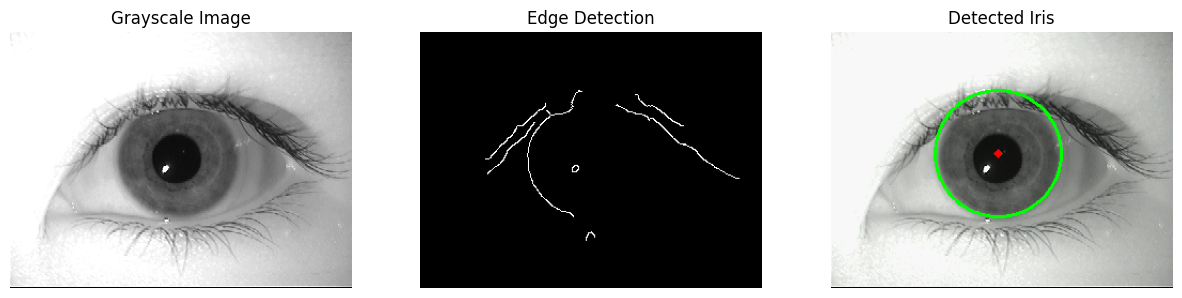

💾 Saved: iris_detected.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ==========================================================
# Iris Detection using Computer Vision (Colab-ready)
# ==========================================================
!pip install -q opencv-python-headless matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ---------------------------
# Step 1: Upload image
# ---------------------------
print("👉 Please upload your eye image (e.g., aeval1.bmp)")
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No file uploaded.")
image_path = next(iter(uploaded.keys()))
print(f"✅ Uploaded: {image_path}")

# ---------------------------
# Step 2: Read and preprocess
# ---------------------------
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Could not read image.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# ---------------------------
# Step 3: Edge detection (Canny)
# ---------------------------
edges = cv2.Canny(blurred, 50, 150)

# ---------------------------
# Step 4: Detect circles (Hough Transform)
# ---------------------------
# Parameters can be tuned based on image resolution
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,                # inverse ratio of accumulator resolution
    minDist=gray.shape[0]/8,  # minimum distance between detected centers
    param1=100,          # higher threshold for Canny edge detector
    param2=30,           # accumulator threshold for circle detection
    minRadius=20,        # adjust according to expected iris size
    maxRadius=100
)

# ---------------------------
# Step 5: Draw the detected iris
# ---------------------------
output = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # Draw outer circle (iris)
        cv2.circle(output, center, radius, (0, 255, 0), 2)
        # Draw center point
        cv2.circle(output, center, 2, (0, 0, 255), 3)
    print(f"✅ Detected {len(circles[0])} circle(s) (possible iris candidates).")
else:
    print("⚠️ No circles detected. Try adjusting minRadius, maxRadius, or thresholds.")

# ---------------------------
# Step 6: Display results
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Iris")
plt.axis('off')

plt.show()

# ---------------------------
# Step 7: Save and download result
# ---------------------------
cv2.imwrite("iris_detected.png", output)
print("💾 Saved: iris_detected.png")
files.download("iris_detected.png")
